In [1]:
import sys
sys.path.append('../../')
from src.util.config import Config

**Setting**
create specific Single Item Auction setting

In [2]:
# parameter mechanism
bidder = ['1']*5
o_space = {i:[0.0, 1.0] for i in bidder}
a_space = {i:[0.0, 0.75] for i in bidder}

param_prior = {'distribution':'uniform'}
param_util = {
    'tie_breaking':'lose', 
    'type':'value',
    'prices': [0.8, 0.2],
} 

# parameter approximation game
n = 64
m = 64

config = Config()
config.create_config_game("crowdsourcing", bidder, o_space, a_space, param_prior, param_util, n, m)
game = config.create_game()
if not game.mechanism.own_gradient:
    print('utilities computed')
    game.get_utility()

**Learner**
Specify Learning Algorithm

In [3]:
# parameter learner
max_iter = int(5e4)
tol = 1e-5
stop_criterion = 'util_loss'
param_learner = {
    "method": "standard",
    "steprule_bool": False,
}

config.create_config_learner("frank_wolfe", max_iter, tol, stop_criterion, param_learner)
learner = config.create_learner()

Run Learning Algorithm

In [4]:
#create and initialize strategies
strategies = config.create_strategies(game, "random")

# run learn algorithm
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

 40%|████████            | 20.1k/50.0k [00:06<00:10, 2.89kit/s]

Convergence after 20075 iterations
Value of stopping criterion (util_loss) 1e-05


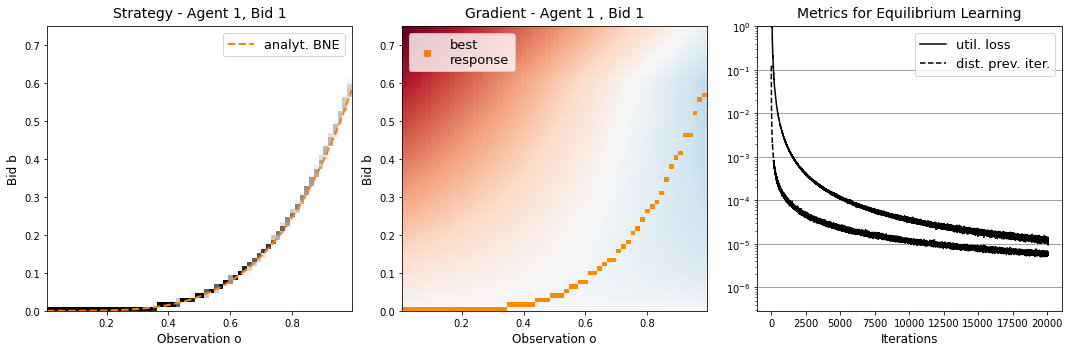

In [7]:
s = strategies['1']
bne = game.mechanism.get_bne('1', s.o_discr)
s.plot(grad=True, metrics=True, beta=bne)